In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/home/adamyunian/Desktop/python_code/algoritma_linear_regression/Simple-Linear-Regression/data.csv',usecols=['horsepower','price'])

In [4]:
# Independent variable(x) adalah horsepower.
# Dependent variabel(y) adalah price.
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [9]:
# Mencari dan menangani missing values.
df.isnull().sum()

horsepower    0
price         0
dtype: int64

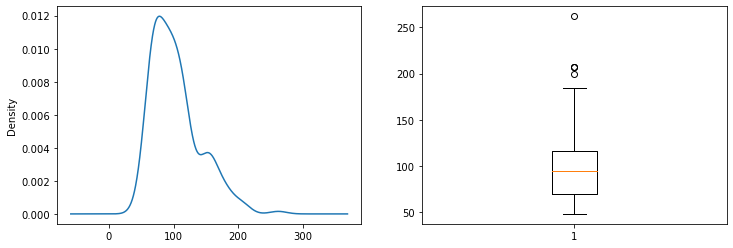

In [11]:
# Univerative analysis horsepower.
# Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

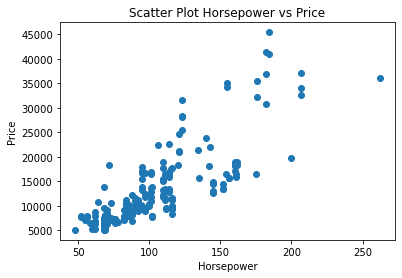

In [12]:
# Bivariate analysis horsepower dan price.
# Menggundang scatter plot.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [13]:
# Mengetahui nilai korelasi dari horsepower dan price.
# Nilai korelasi adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [14]:
# Buat variable x dan y
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [17]:
# kita split data kita menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2)

In [18]:
lin_reg = LinearRegression()

In [19]:
# training model menggunakan training data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [20]:
# cari nilai koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[177.49256104]]
[-5083.47318711]


In [21]:
# Cari nilai accuracy score
lin_reg.score(x_test, y_test)

0.6642747259150329

Text(0.5, 1.0, 'Plot Horsepower vs Price')

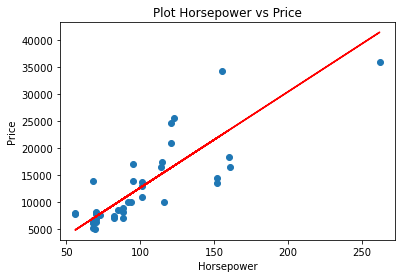

In [22]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [23]:
# Prediksi harga moil dengan horsepower 100.
lin_reg.predict([[100]])

array([[12665.78291738]])

In [24]:
# Prediksi harga mobil dengan horsepower 150.
lin_reg.predict([[150]])

array([[21540.41096962]])

In [25]:
# Prediksi harga mobil dengan horsepower 200.
lin_reg.predict([[200]])

array([[30415.03902187]])